# Implementing CNNs with Keras
## Building an Image Classifier Using the Sequential API
### Loading and Preprocessing the CIFAR‑10 Dataset

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 1) Load & split the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [9]:
print(X_train.shape)
print(y_train.shape)

print(X_train[0].shape)
print(y_train[0].shape)

print(y_test[0])

(55000, 28, 28)
(55000,)
(28, 28)
()
9


In [10]:
# 1. Reshape to add the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_valid = X_valid.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

In [11]:
# 2) Normalize pixels to [0,1]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

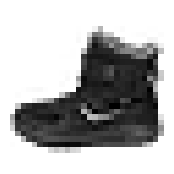

In [12]:
plt.figure(figsize=(2, 2))  # Smaller size
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [15]:
# Compile & train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 17s 9ms/step - loss: 0.5114 - accuracy: 0.8134 - val_loss: 0.3639 - val_accuracy: 0.8652
Epoch 2/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3334 - accuracy: 0.8783 - val_loss: 0.3117 - val_accuracy: 0.8872
Epoch 3/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2884 - accuracy: 0.8933 - val_loss: 0.2907 - val_accuracy: 0.8920
Epoch 4/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2560 - accuracy: 0.9056 - val_loss: 0.3045 - val_accuracy: 0.8942
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2337 - accuracy: 0.9132 - val_loss: 0.3046 - val_accuracy: 0.8940
Epoch 6/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2130 - accuracy: 0.9202 - val_loss: 0.2597 - val_accuracy: 0.9034
Epoch 7/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.1943 - accuracy: 0.9269 - val_loss: 0.2540 - val_a

In [17]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.9079

Test Accuracy: 0.9079


In [18]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)
# y_proba

1/1 [==============================] - 0s 82ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [19]:

# 7) Predict on new samples
X_new = X_test[:5]
y_pred_probs = model.predict(X_new)
print(y_pred_probs.round(2))
y_pred = np.argmax(y_pred_probs, axis=1)

for i, (pred, true) in enumerate(zip(y_pred, y_test[:5])):
    print(f"Sample {i}: Predicted={pred}, True={true}")

1/1 [==============================] - 0s 21ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.08 0.   0.   0.   0.   0.   0.92 0.   0.   0.  ]]
Sample 0: Predicted=9, True=9
Sample 1: Predicted=2, True=2
Sample 2: Predicted=1, True=1
Sample 3: Predicted=1, True=1
Sample 4: Predicted=6, True=6


In [20]:
y_pred = y_pred_probs.argmax(axis=-1)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)

In [21]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [22]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)